In [28]:
import pandas as pd
import json
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [29]:
with open('./data/sneaker_info.json') as f:
    sneaker_info = json.load(f)

In [30]:
data = []
style_info_columns = ['shoeName', 'brand', 'make', 'colorway', 'retailPrice', 'releaseDate']
df_columns = ['Lasso Sneaker Name', 'StockX Price', 'Flight Club Price', 'GOAT Price', 'Matched Sneaker Name', 'Brand', 'Make', 'Colorway', 'Retail Price', 'Release Date']
for sneaker, info in sneaker_info.items():
    try:
        resell_prices = [info['lowestResellPrice']['stockX'], info['lowestResellPrice']['flightClub'], info['lowestResellPrice']['goat']]
    except:
        resell_prices = ['', '', '']
    style_info = [info[col] for col in style_info_columns]
    row = [sneaker, *resell_prices, *style_info]
    data.append(row)

df = pd.DataFrame(data, columns=df_columns)

In [31]:
df

,Lasso Sneaker Name,StockX Price,Flight Club Price,GOAT Price,Matched Sneaker Name,Brand,Make,Colorway,Retail Price,Release Date
0,Jordan Zoom Zero Gravity,169,89,89,Nike Court Air Zoom Zero Aqua (Women's),Nike,Nike Court Air Zoom Zero,White/Bright Concord-Aquatone-Varsity Red,190,2019-08-26
1,Jordan React Havoc Paris Saint-Germain (PSG),897,115,115,Jordan React Havoc PSG Paris Saint-Germain,Jordan,Jordan React Havoc,White/Black-Infrared 23,130,2019-08-10
2,Nike Tanjun in Midnight Navy/Game Royal/White,,,,Nike Tanjun Midnight Navy,Nike,Nike Tanjun,Midnight Navy/Game Royal/White,65,
3,Nike Air Huarache Premium ‘Varsity Jacket’ in Red,,,,Nike Air Huarache Run Varsity Jacket Red,Nike,Nike Air Huarache Run,University Red/Sail/Blackened Blue,120,2018-06-23
4,Odyssey React 2 Flyknit ‘Black Racer Blue’,41,105,105,Nike Odyssey React 2 Flyknit Black Racer Blue,Nike,Nike Odyssey React 2 Flyknit,Black/Racer Blue/White,120,2020-08-05
5,Eric Koston Air Jordan 1 Low ‘Powder Blue’,130,115,115,Jordan 1 Retro Low OG Black Dark Powder Blue,Jordan,Jordan 1 Retro Low OG,White/Dark Powder Blue/Black,130,2022-07-29
6,JIMMY CHOO Diamond X Strap/F Leather Sneakers,,,,Jimmy Choo Diamond Sneakers White,Jimmy Choo,Jimmy Choo Diamond Sneakers,Diamond/F Cat White,474,
7,Nike Blazer Low X ‘White Light Photo Blue’,,,,Nike Blazer Low X White Blue,Nike,Nike Blazer Low X,White/University Blue-Neutral Grey,95,
8,Eric Koston x Air Jordan 1 Low SB ‘Powder Blue’,437,429,429,Jordan 1 Low SB UNC,Jordan,Jordan 1 Low SB,Dark Powder Blue/White,110,2019-08-12
9,Nike Waffle One Summer of Sports Pack,114,80,124,Nike Waffle One Summer of Sports,Nike,Nike Waffle One,White/Off White/Multicolor,100,2021-08-05


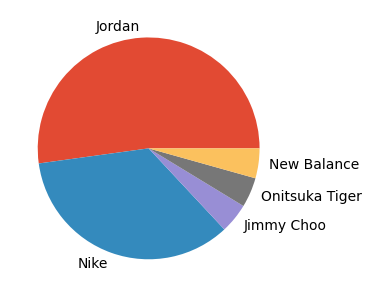

In [39]:
fig = plt.figure(figsize=(4,4))
df['Brand'].value_counts().plot(kind='pie')
plt.tight_layout()
plt.axis('off')
fig.savefig('./mosaics/brand-pie.png')

In [24]:
df['Retail Price'].describe()

count     23.000000
mean     143.000000
std       83.195826
min       65.000000
25%       95.000000
50%      120.000000
75%      160.000000
max      474.000000
Name: Retail Price, dtype: float64

In [25]:
price_cols = ['Retail Price', 'StockX Price', 'GOAT Price']
for col in price_cols:
    df[col] = pd.to_numeric(df[col],errors='coerce')
my_dict = df[price_cols].to_dict(orient='list')
for key, val in my_dict.items():
    my_dict[key] = [x for x in val if not pd.isnull(x)]

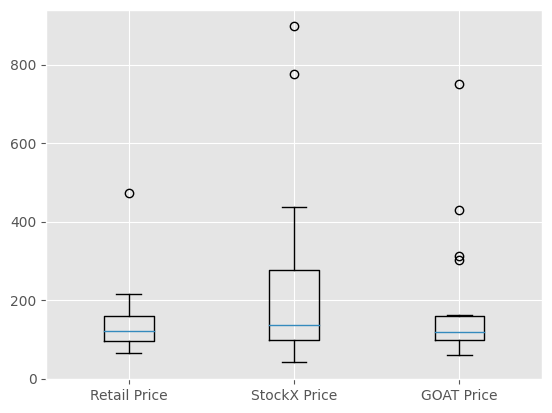

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys());